In [1]:
import pandas as pd
df2 = pd.read_csv("ee_bp19.csv")
df1= pd.read_csv("ee_bp24.csv")

Text(0.5, 1.0, 'Méthode du coude')

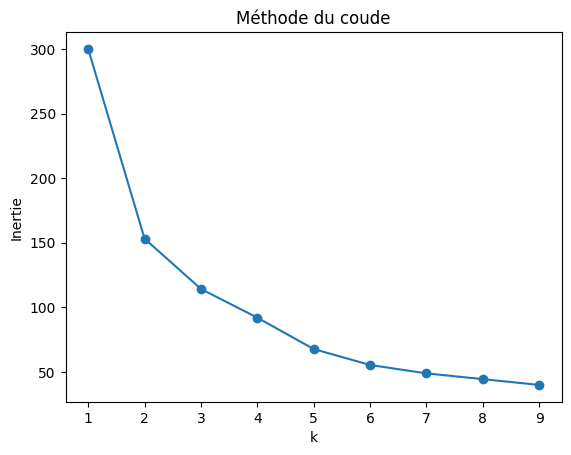

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df2[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []

for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertie")
plt.title("Méthode du coude")


In [4]:
k =3
km = KMeans(n_clusters=k, random_state=42)
df2["cluster"] = km.fit_predict(X_scaled)
df2.groupby("cluster")[["G","C","D"]].mean()

,G,C,D
cluster,,,
0,0.302069,0.376043,0.321889
1,0.226460,0.290782,0.482758
2,0.285839,0.306272,0.407889


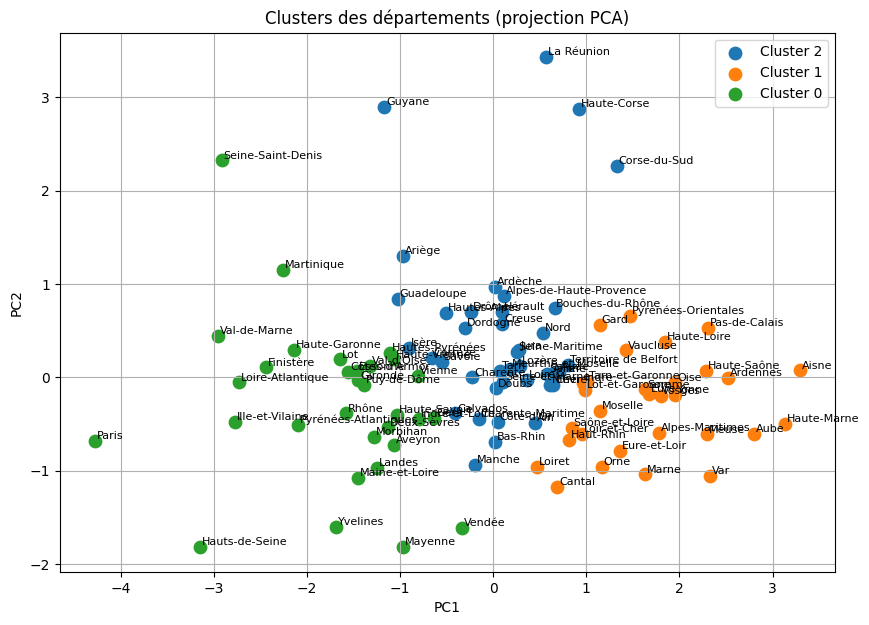

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df2["PC1"] = X_pca[:, 0]
df2["PC2"] = X_pca[:, 1]

# Visualisation 
plt.figure(figsize=(10, 7))
for cluster in df2["cluster"].unique():
    subset = df2[df2["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df2)):
    plt.text(df2["PC1"][i] + 0.02, df2["PC2"][i] + 0.02, df2["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les scores des partis (regroupés en trois blocs : gauche, centre et droite) met en évidence trois profils électoraux distincts.
Le cluster 1 se caractérise par une nette domination du bloc de droite (48 %), ce qui renvoie à des départements plus conservateurs et davantage orientés vers les partis souverainistes ou libéraux-conservateurs.
Le cluster 2 montre également un avantage de la droite (41 %), mais dans une mesure moins marquée, suggérant un profil centre-droit modéré.
Enfin, le cluster 0 présente un équilibre gauche/droite, mais avec une domination du centre (38 %)

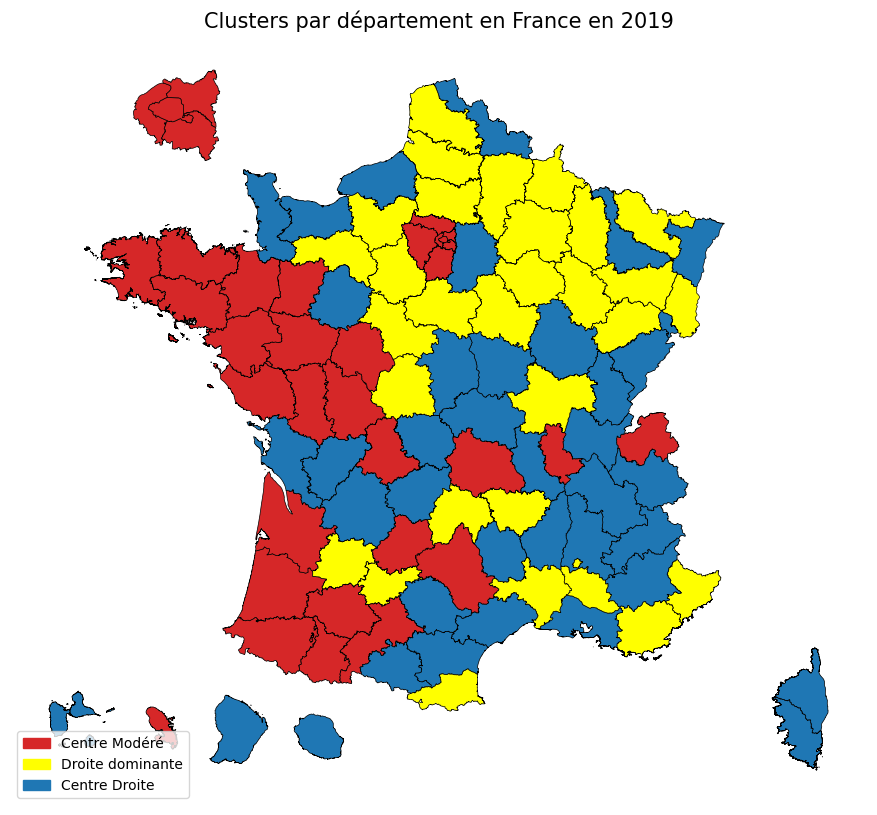

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df2[["Dep", "cluster"]]
    
departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Centre Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2019', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

In [9]:
url = "https://www.data.gouv.fr/api/1/datasets/r/500d1954-9849-479b-9aac-85435c6d422f"
# Lecture avec encodage adapté
chom = pd.read_excel(url, engine='openpyxl', header = 5, usecols=[0,1,7,12],  #[0,1,7,10,12]
 nrows=101, sheet_name="Moyenne annuelle").rename(columns = {"Unnamed: 1": "Dep",
2019: "chom19", 2024: "chom24"}).drop(columns=["Département"]).dropna()

dff= df2.iloc[:,:5].merge(chom.iloc[:,:-1], on='Dep')
dff['Majority_Leaning'] = dff[['G', 'C', 'D']].idxmax(axis=1)
print(dff.groupby('Majority_Leaning')['chom19'].mean())
print(dff.groupby('cluster')['chom19'].mean())

Majority_Leaning
C     7.108696
D     8.586301
G    14.725000
Name: chom19, dtype: float64
cluster
0    7.580645
1    8.814167
2    8.817105
Name: chom19, dtype: float64


Text(0.5, 1.0, 'Méthode du coude')

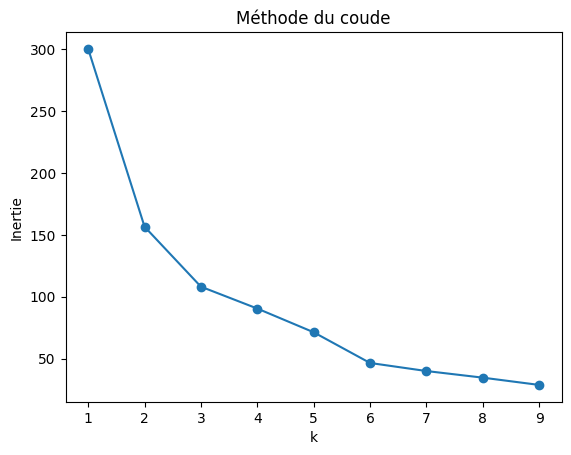

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df1[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []

for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertie")
plt.title("Méthode du coude")


In [3]:
k =3
km2 = KMeans(n_clusters=k, random_state=42)
df1["cluster"] = km2.fit_predict(X_scaled)
df1.groupby("cluster")[["G","C","D"]].mean()

,G,C,D
cluster,,,
0,0.238710,0.344445,0.416845
1,0.200751,0.260968,0.538281
2,0.380258,0.249729,0.370013


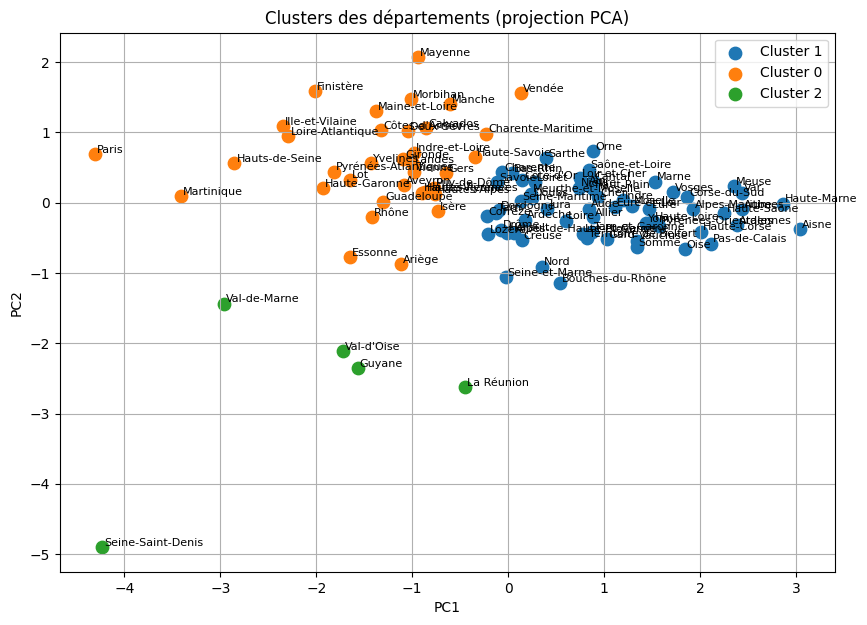

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df1["PC1"] = X_pca[:, 0]
df1["PC2"] = X_pca[:, 1]

# Visualisation 
plt.figure(figsize=(10, 7))
for cluster in df1["cluster"].unique():
    subset = df1[df1["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df1)):
    plt.text(df1["PC1"][i] + 0.02, df1["PC2"][i] + 0.02, df1["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les résultats électoraux permet d’identifier trois profils politiques distincts de départements : un cluster dominé par la droite, un cluster marqué par un vote de gauche plus élevé mais avec presence de la droite et un cluster intermédiaire à dominante centriste-droite.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartiflette] [cartiflette]


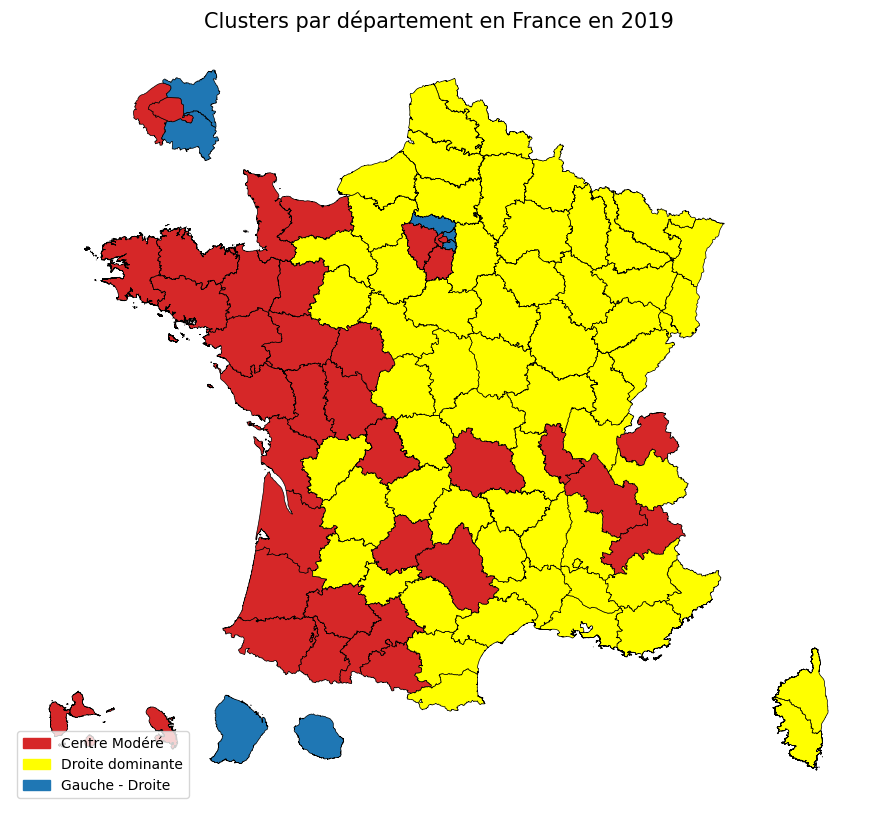

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df1[["Dep", "cluster"]]
    
departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Gauche - Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2019', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

In [13]:
url = "https://www.data.gouv.fr/api/1/datasets/r/500d1954-9849-479b-9aac-85435c6d422f"
# Lecture avec encodage adapté
chom = pd.read_excel(url, engine='openpyxl', header = 5, usecols=[0,1,7,12],  #[0,1,7,10,12]
 nrows=101, sheet_name="Moyenne annuelle").rename(columns = {"Unnamed: 1": "Dep",
2019: "chom19", 2024: "chom24"}).drop(columns=["Département"]).dropna()

dff= df1.iloc[:,:5].merge(chom.iloc[:,:], on='Dep')
dff['Majority_Leaning'] = dff[['G', 'C', 'D']].idxmax(axis=1)
print(dff.groupby('Majority_Leaning')['chom24'].mean())
print(dff.groupby('cluster')['chom24'].mean())

Majority_Leaning
C    6.945833
D    7.353022
G    8.800000
Name: chom24, dtype: float64
cluster
0     6.775000
1     7.479167
2    10.631250
Name: chom24, dtype: float64


Derniere etape faire des fonctions pour automatiser tout ce qui est fait 2 fois afin de rendre quelque chose de plus propre
